In [65]:
include("fld.jl")
using PyPlot
using CSV

In [80]:
tfinal = 4.82

sol = convert(Array,CSV.read("problem1_karlsruhe.csv", header=0));

In [109]:

println("Running until time $(tfinal)")
#set up Marshak wave problem with large R
Nr = 10
Nz = 30
Lz = 0.06
println("Size of domain in Z is $(Lz)")
Lr = 1
dr = Lr/Nr
dz = Lz/Nz

T = zeros(Nr*Nz).+1.0e-8

GJperKeVconv = 1e-9*(11604.505*1e3)

Cvval = 2.7*0.831*GJperKeVconv
sigval = 1.0/(9.26e-6*1e2)
println("Sigma = ", sigval)
println("Cv = ", Cvval)
sigma_func(t,T,Nr,Nz,Lr,Lz) = sigval .+ 0*reshape(T,Nr,Nz)
D_func(t,T,Nr,Nz,Lr,Lz,Er,sigma) = 1.0./(3.0*sigma)
Cv_func(t,T,Nr,Nz,Lr,Lz) = reshape(Cvval.+T.*0, Nr,Nz)
EOS(t,T,Nr,Nz,Lr,Lz) = Cvval.*T
invEOS(t,E,Nr,Nz,Lr,Lz) = (E./Cvval)

function Q_func(t,T,Nr,Nz,Lr,Lz)
    Q = zeros(Nr,Nz)
end
    

Running until time 4.82
Size of domain in Z is 0.06
Sigma = 1079.9136069114472
Cv = 0.026037027868500002


Q_func (generic function with 1 method)

In [110]:
times, Er_t,T_t = time_dep_RT(tfinal,0.001,T,zeros(Nr*Nz),D_func, sigma_func, Q_func,Cv_func,EOS,invEOS,
                      Nr, Nz, Lr, Lz, lower_z=a*0.08^4, upper_z="vacuum", upper_r="vacuum",LOUD=-1);

4821
Step 4821, t = 4.82


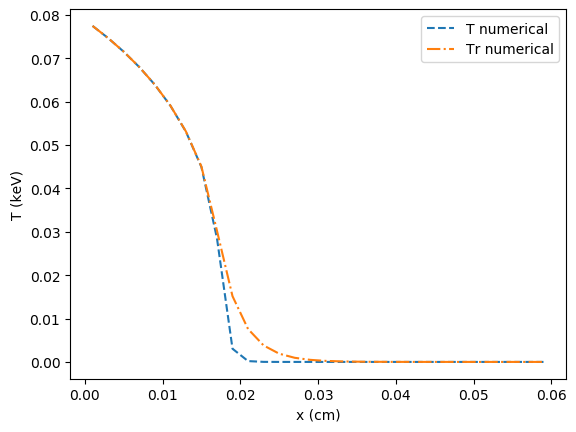

PyObject Text(24.000000000000007, 0.5, 'T (keV)')

In [118]:
hr = Lr/Nr
hz = Lz/Nz
zmid = range(hz*0.5, stop=Lz-hz*0.5,length=Nz)
T_plot = reshape(T_t[:,size(times)[1]],Nr,Nz)
plot(zmid,T_plot[5,:,1],"--", label="T numerical")
Tr_plot = reshape((Er_t[:,size(times)[1]]/a).^.25,Nr,Nz)
plot(zmid,Tr_plot[5,:,1],"-.", label="Tr numerical")
#plot((maximum(sol[:,1]).-sol[:,1]),sol[:,2].*0.001,"o")
legend(loc="best")
xlabel("x (cm)")
ylabel("T (keV)")

In [112]:
rcenter = range(0.5*dr, stop=Lr-0.5*dr, length=Nr)
zcenter = range(0.5*dz, stop=Lz-0.5*dz, length=Nz)
R,Z = meshgrid(rcenter,zcenter)

([0.05 0.05 … 0.05 0.05; 0.15 0.15 … 0.15 0.15; … ; 0.85 0.85 … 0.85 0.85; 0.95 0.95 … 0.95 0.95], [0.001 0.003 … 0.057 0.059; 0.001 0.003 … 0.057 0.059; … ; 0.001 0.003 … 0.057 0.059; 0.001 0.003 … 0.057 0.059])

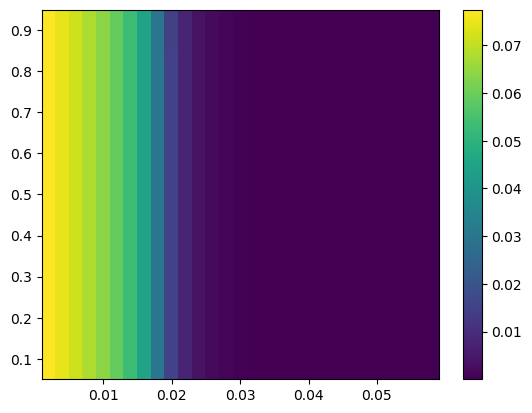

PyObject <matplotlib.colorbar.Colorbar object at 0x1588c4910>

In [113]:
pcolormesh(Z,R,Tr_plot)
colorbar()

In [114]:
println(T_plot[5,:]*1000)

[77.45884419533827, 74.65338044004778, 71.52504732428696, 67.98984311321047, 63.91936241646219, 59.09859826095941, 53.11285110211229, 44.9298052858454, 28.50819722579295, 3.038078391084346, 0.19078076673313035, 0.011984122850556483, 0.0007615805780431473, 5.717450892473838e-5, 1.296100558917297e-5, 1.018585363788608e-5, 1.001166548784711e-5, 1.0000732208463963e-5, 1.0000045958577995e-5, 1.0000002884685091e-5, 1.0000000181063124e-5, 1.0000000011364649e-5, 1.0000000000713182e-5, 1.0000000000044607e-5, 1.0000000000002637e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5]


In [115]:
println(Array(zmid))

[0.001, 0.003, 0.005, 0.007, 0.009, 0.011, 0.013, 0.015, 0.017, 0.019, 0.021, 0.023, 0.025, 0.027, 0.029, 0.031, 0.033, 0.035, 0.037, 0.039, 0.041, 0.043, 0.045, 0.047, 0.049, 0.051, 0.053, 0.055, 0.057, 0.059]
